**A1**

In [10]:
import numpy as np
import soundfile as sf
import librosa

audio_signal, sample_rate = librosa.load("Lab04.wav")

fft_result = np.fft.fft(audio_signal)
amplitude_spectrum = np.abs(fft_result)

frequency_bins = np.fft.fftfreq(len(audio_signal), d=1/sample_rate)

print("FFT Result:\n", fft_result)
print("Amplitude Spectrum:\n", amplitude_spectrum)
print("Frequency Bins:\n", frequency_bins)

FFT Result:
 [ 2.0469084 -1.37667655e-14j  0.17970143+3.91625997e+00j
 -0.22119331-1.82303727e+00j ... -0.80613048+3.73219503e-01j
 -0.22119331+1.82303727e+00j  0.17970143-3.91625997e+00j]
Amplitude Spectrum:
 [2.0469084  3.92038069 1.83640719 ... 0.88833504 1.83640719 3.92038069]
Frequency Bins:
 [ 0.          0.16275946  0.32551891 ... -0.48827837 -0.32551891
 -0.16275946]


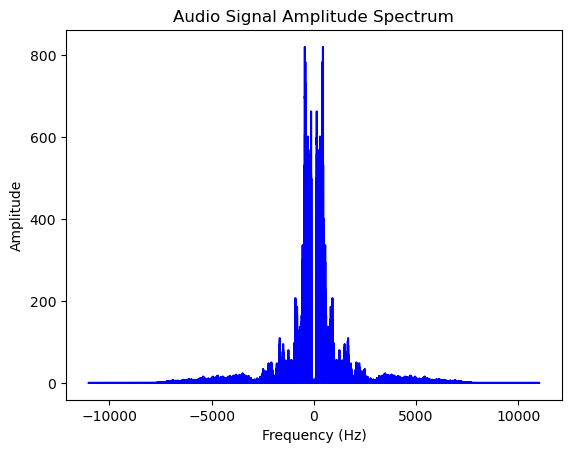

In [11]:
import matplotlib.pyplot as plt

plt.plot(frequency_bins, amplitude_spectrum, color="blue")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Audio Signal Amplitude Spectrum")
plt.show()

**A2**

In [12]:
time_domain_signal = np.fft.ifft(fft_result)
time_domain_signal = time_domain_signal[:len(audio_signal)]

C:\Users\deven\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


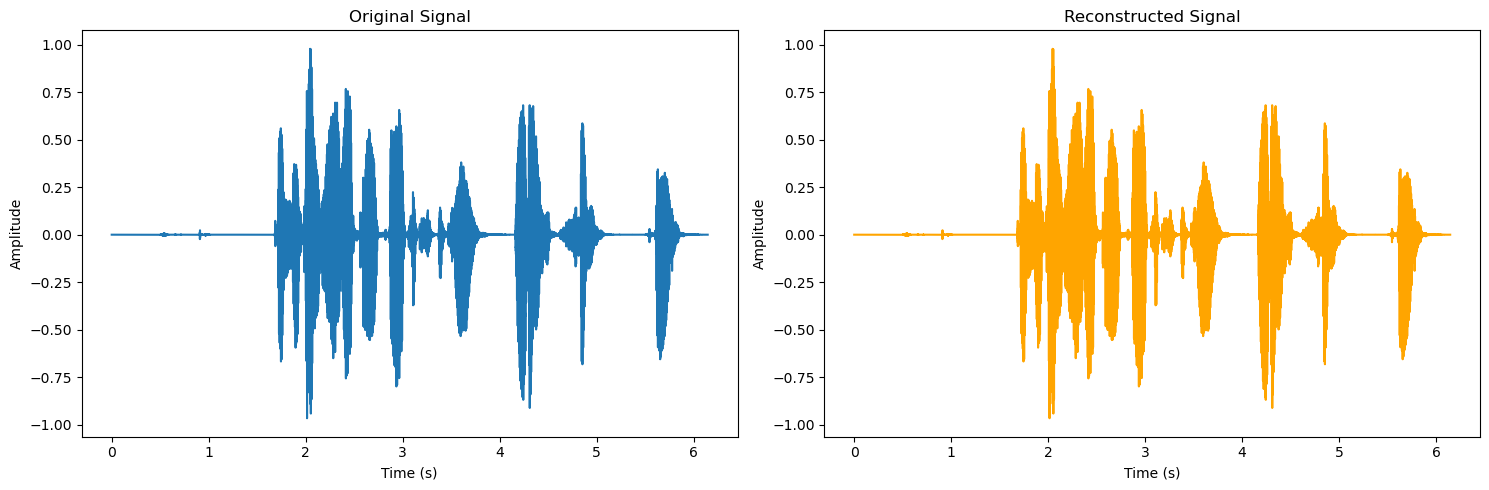

In [13]:
time = np.linspace(0, len(audio_signal)/sample_rate, len(audio_signal))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time, audio_signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(time, time_domain_signal, color="orange")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()

**A3**

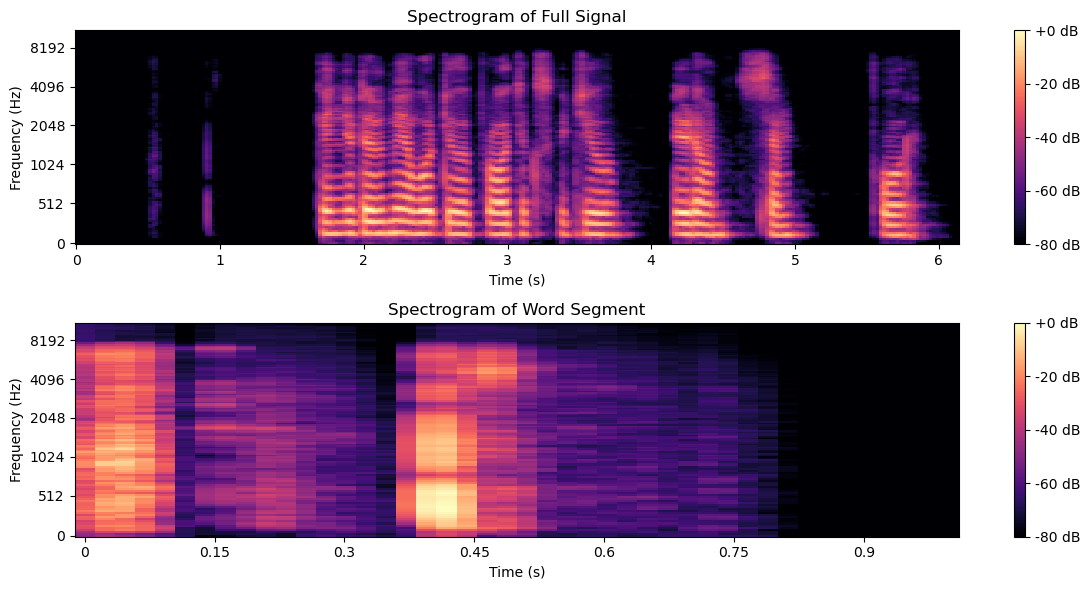

In [14]:
audio_path = 'Lab04.wav'
full_signal, sample_rate = librosa.load(audio_path)

word_start_time = 0.5 
word_end_time = 1.5

start_sample = librosa.time_to_samples(word_start_time, sr=sample_rate)
end_sample = librosa.time_to_samples(word_end_time, sr=sample_rate)

word_segment = full_signal[start_sample:end_sample]

full_spectrogram = librosa.feature.melspectrogram(y=full_signal, sr=sample_rate)
word_spectrogram = librosa.feature.melspectrogram(y=word_segment, sr=sample_rate)

full_spectrogram_db = librosa.power_to_db(full_spectrogram, ref=np.max)
word_spectrogram_db = librosa.power_to_db(word_spectrogram, ref=np.max)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(full_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Full Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
librosa.display.specshow(word_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Word Segment')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

**A4**

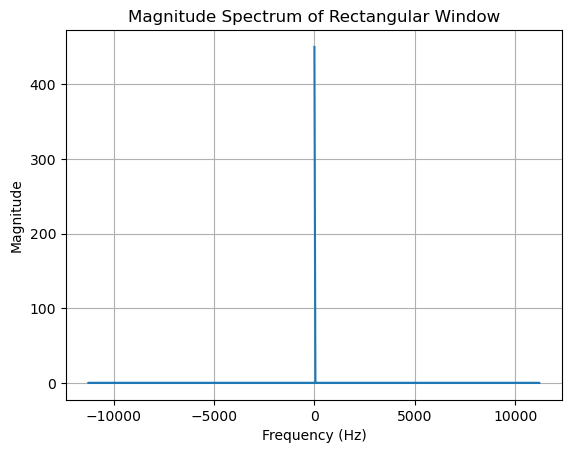

In [15]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 22500
window_duration = 0.02

window_length_samples = int(window_duration * sampling_rate)
rectangular_window = np.ones(window_length_samples)

fft_result = np.fft.fft(rectangular_window)

frequency_axis = np.fft.fftfreq(window_length_samples, 1 / sampling_rate)

plt.plot(frequency_axis, np.abs(fft_result))
plt.title('Magnitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

**A5**

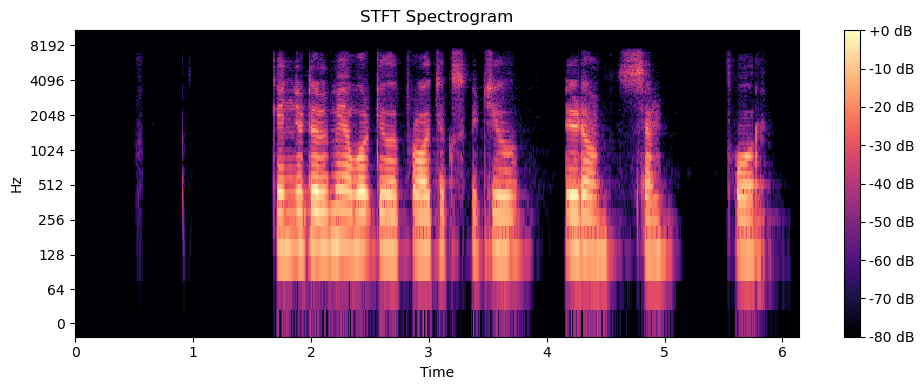

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

file_path = "Lab04.wav"
audio_signal, sample_rate = librosa.load(file_path)

window_length = int(0.02 * sample_rate)
hop_length = int(0.01 * sample_rate)
stft_matrix = librosa.stft(audio_signal, n_fft=window_length, hop_length=hop_length)
stft_amplitude = np.abs(stft_matrix)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft_amplitude, ref=np.max), sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.show()

**A6**

C:\Users\deven\AppData\Local\Temp\ipykernel_22204\1629795976.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_scipy), shading='gouraud')


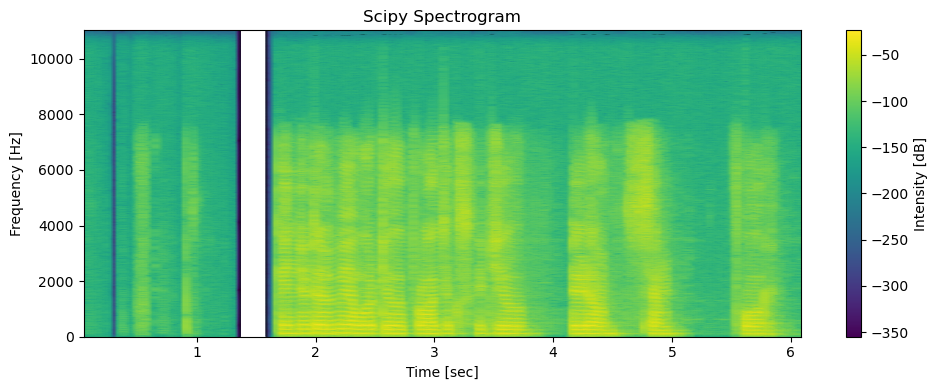

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import librosa
import librosa.display

file_path = "Lab04.wav"
audio_signal, sample_rate = librosa.load(file_path)

frequencies, times, spectrogram_scipy = spectrogram(audio_signal, fs=sample_rate, nperseg=2048, noverlap=1536)

plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_scipy), shading='gouraud')
plt.title('Scipy Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.tight_layout()
plt.show()